In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 1 . Data Preprocessing and Exploration

In [119]:
# Create HIGGS_sample from HIGGS dataset; to do later

In [120]:
# Load HIGGS_sample

filepath = "./HIGGS_sample.csv"
data = pd.read_csv(filepath)

### 1.1 Exploratory Data Analysis (EDA)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   1.000000000000000000e+00    110000 non-null  float64
 1   8.692932128906250000e-01    110000 non-null  float64
 2   -6.350818276405334473e-01   110000 non-null  float64
 3   2.256902605295181274e-01    110000 non-null  float64
 4   3.274700641632080078e-01    110000 non-null  float64
 5   -6.899932026863098145e-01   110000 non-null  float64
 6   7.542022466659545898e-01    110000 non-null  float64
 7   -2.485731393098831177e-01   110000 non-null  float64
 8   -1.092063903808593750e+00   110000 non-null  float64
 9   0.000000000000000000e+00    110000 non-null  float64
 10  1.374992132186889648e+00    110000 non-null  float64
 11  -6.536741852760314941e-01   110000 non-null  float64
 12  9.303491115570068359e-01    110000 non-null  float64
 13  1.107436060905

In [122]:
data.describe() # summary statistics

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,...,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,0.528155,0.993285,-0.005985,-0.002650,0.998366,0.001416,0.990549,0.003786,-0.006673,1.004337,...,-0.000581,0.000222,0.994672,1.032670,1.025995,1.050662,1.011109,0.975567,1.034330,0.961325
std,0.499209,0.569758,1.007981,1.004571,0.603324,1.007990,0.476472,1.012672,1.007398,1.027857,...,1.009341,1.005146,1.399653,0.674207,0.382991,0.162497,0.399684,0.527061,0.366120,0.315269
min,0.000000,0.274697,-2.434976,-1.742508,0.001690,-1.743932,0.157473,-2.969725,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.101603,0.297987,0.234146,0.292503,0.067156,0.340333,0.370761
25%,0.000000,0.591119,-0.746114,-0.872486,0.575659,-0.871000,0.679084,-0.687245,-0.879738,0.000000,...,-0.710026,-0.870924,0.000000,0.789034,0.846460,0.985767,0.769028,0.675868,0.820544,0.771713
50%,1.000000,0.852639,-0.007846,-0.003570,0.889777,0.000287,0.894270,0.005916,-0.008257,1.086538,...,-0.002959,-0.001374,0.000000,0.894816,0.951576,0.989783,0.916808,0.874679,0.948435,0.873488
75%,1.000000,1.238789,0.734318,0.864890,1.291532,0.877119,1.167351,0.692145,0.861660,2.173076,...,0.715767,0.869941,3.101961,1.025956,1.084873,1.021725,1.144072,1.139780,1.141846,1.059154
max,1.000000,8.790659,2.434868,1.743236,11.531485,1.743257,7.419452,2.966703,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.002125,9.153964,3.954101,8.140121,8.835245,6.775816,5.111963


In [123]:
data.nunique() # number of unique values in each column

1.000000000000000000e+00           2
8.692932128906250000e-01       13435
-6.350818276405334473e-01       4934
2.256902605295181274e-01        6284
3.274700641632080078e-01      103448
-6.899932026863098145e-01     103560
7.542022466659545898e-01       21082
-2.485731393098831177e-01       5768
-1.092063903808593750e+00       6284
0.000000000000000000e+00           3
1.374992132186889648e+00       16990
-6.536741852760314941e-01       5859
9.303491115570068359e-01        6284
1.107436060905456543e+00           3
1.138904333114624023e+00       12757
-1.578198313713073730e+00       5937
-1.046985387802124023e+00       6284
0.000000000000000000e+00.1         3
6.579295396804809570e-01        9613
-1.045456994324922562e-02       5987
-4.576716944575309753e-02       6284
3.101961374282836914e+00           3
1.353760004043579102e+00       99448
9.795631170272827148e-01       74371
9.780761599540710449e-01       49334
9.200048446655273438e-01       84054
7.216574549674987793e-01       90893
9

In [124]:
data.isnull().sum() # number of missing values in each column

1.000000000000000000e+00      0
8.692932128906250000e-01      0
-6.350818276405334473e-01     0
2.256902605295181274e-01      0
3.274700641632080078e-01      0
-6.899932026863098145e-01     0
7.542022466659545898e-01      0
-2.485731393098831177e-01     0
-1.092063903808593750e+00     0
0.000000000000000000e+00      0
1.374992132186889648e+00      0
-6.536741852760314941e-01     0
9.303491115570068359e-01      0
1.107436060905456543e+00      0
1.138904333114624023e+00      0
-1.578198313713073730e+00     0
-1.046985387802124023e+00     0
0.000000000000000000e+00.1    0
6.579295396804809570e-01      0
-1.045456994324922562e-02     0
-4.576716944575309753e-02     0
3.101961374282836914e+00      0
1.353760004043579102e+00      0
9.795631170272827148e-01      0
9.780761599540710449e-01      0
9.200048446655273438e-01      0
7.216574549674987793e-01      0
9.887509346008300781e-01      0
8.766783475875854492e-01      0
dtype: int64

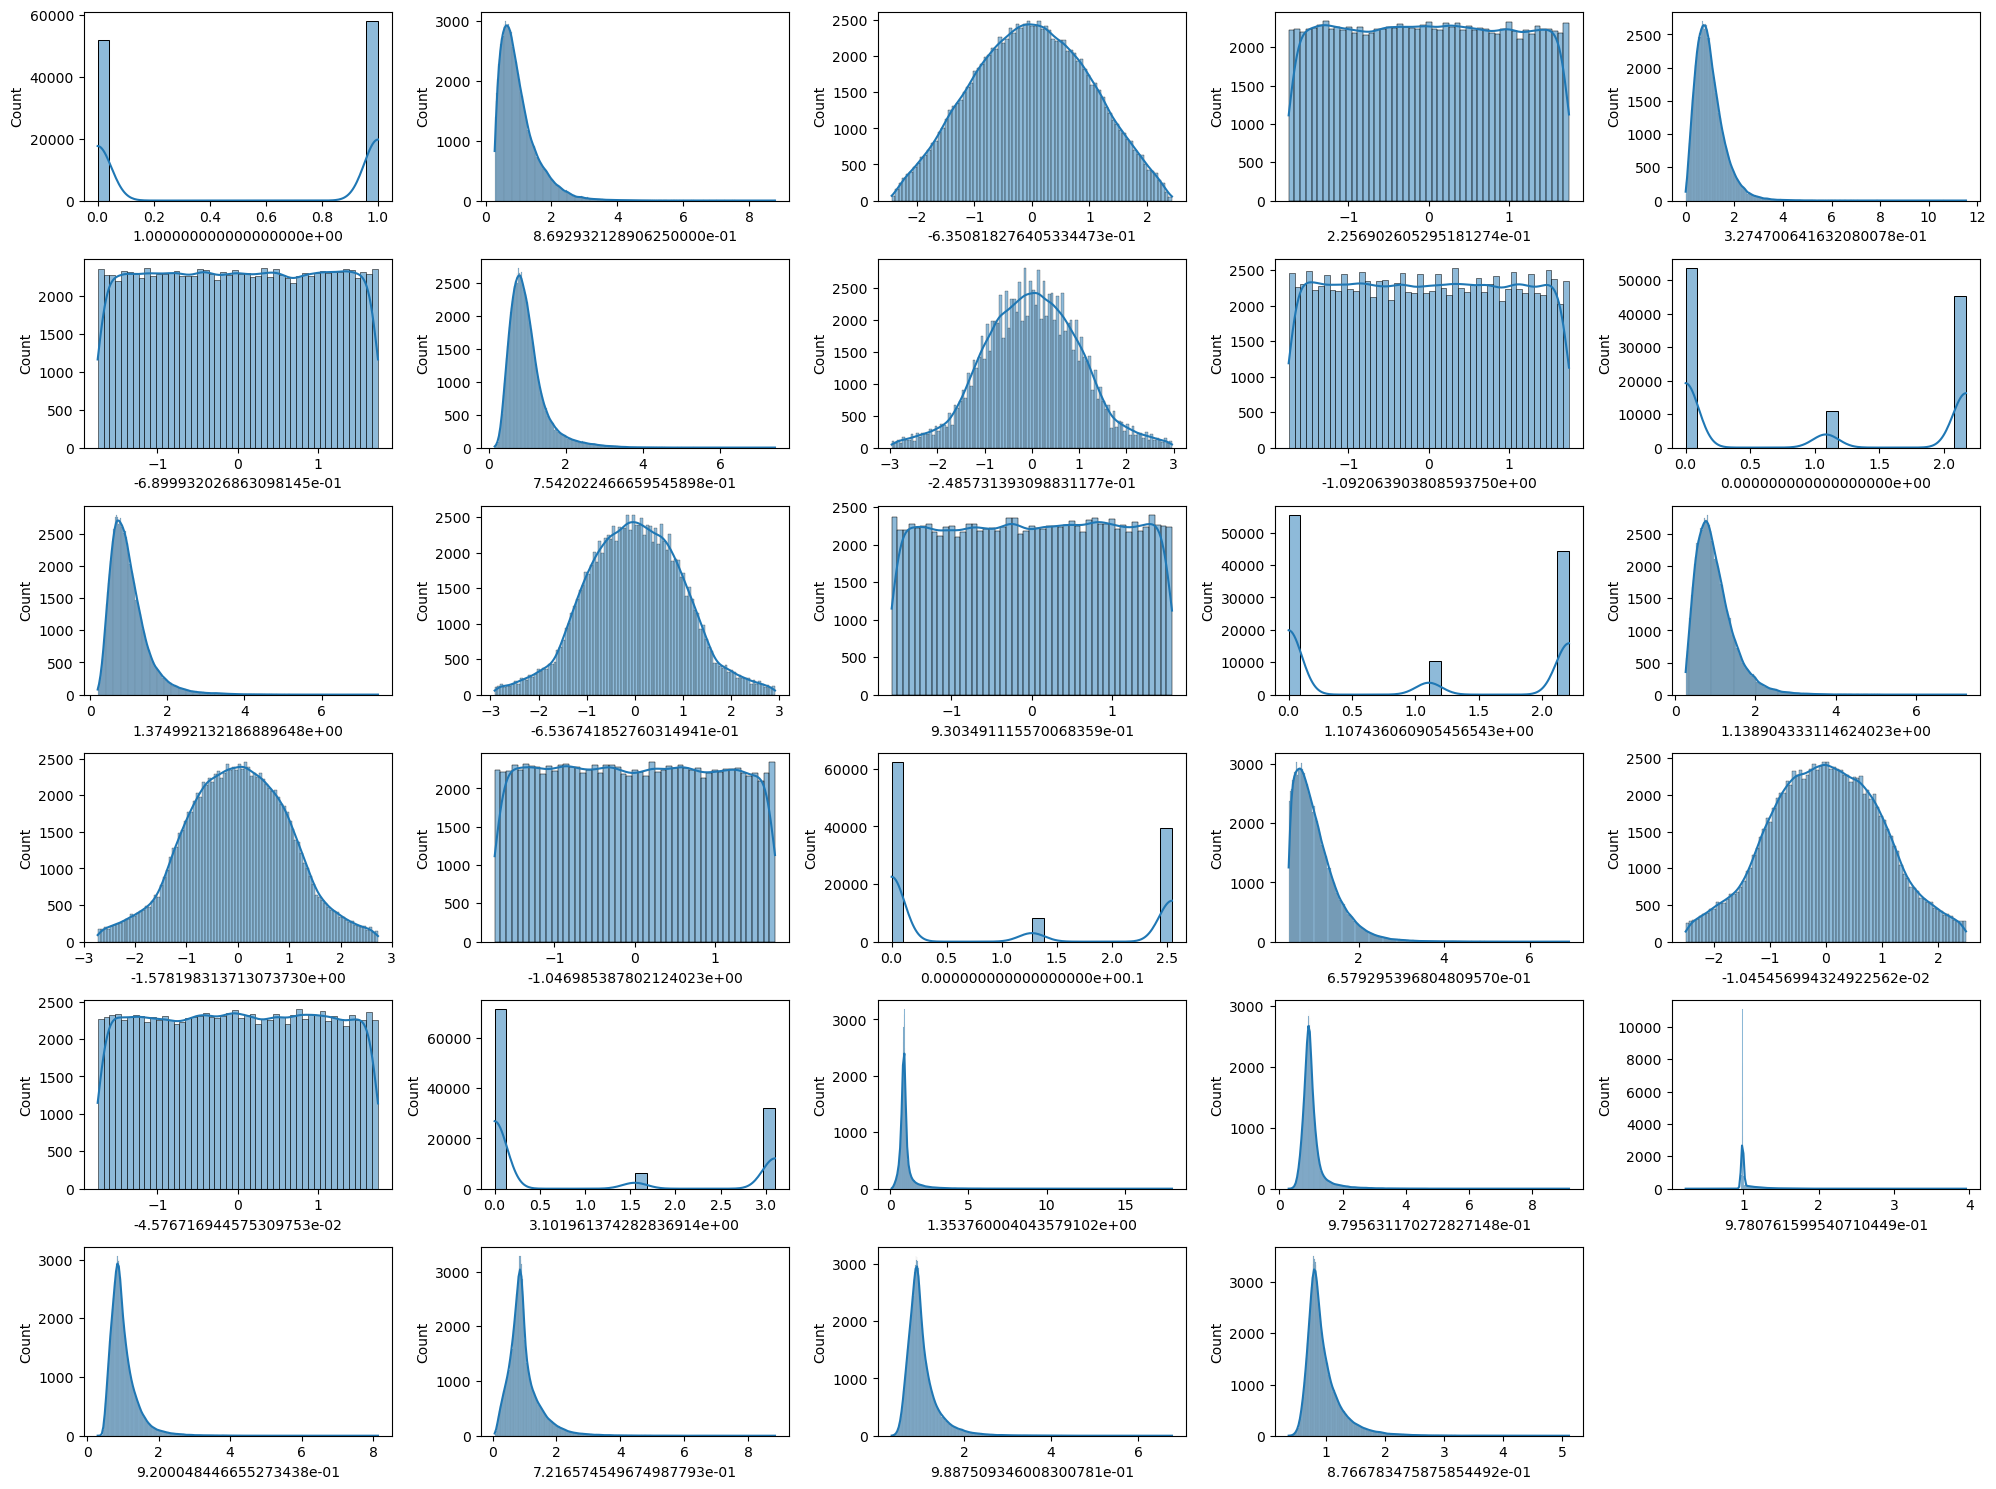

In [125]:
plt.figure(figsize=(20, 15))
rows, cols = 6, 5

for idx, column in enumerate(data.columns):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(data[column], kde=True)

plt.tight_layout()
plt.show()

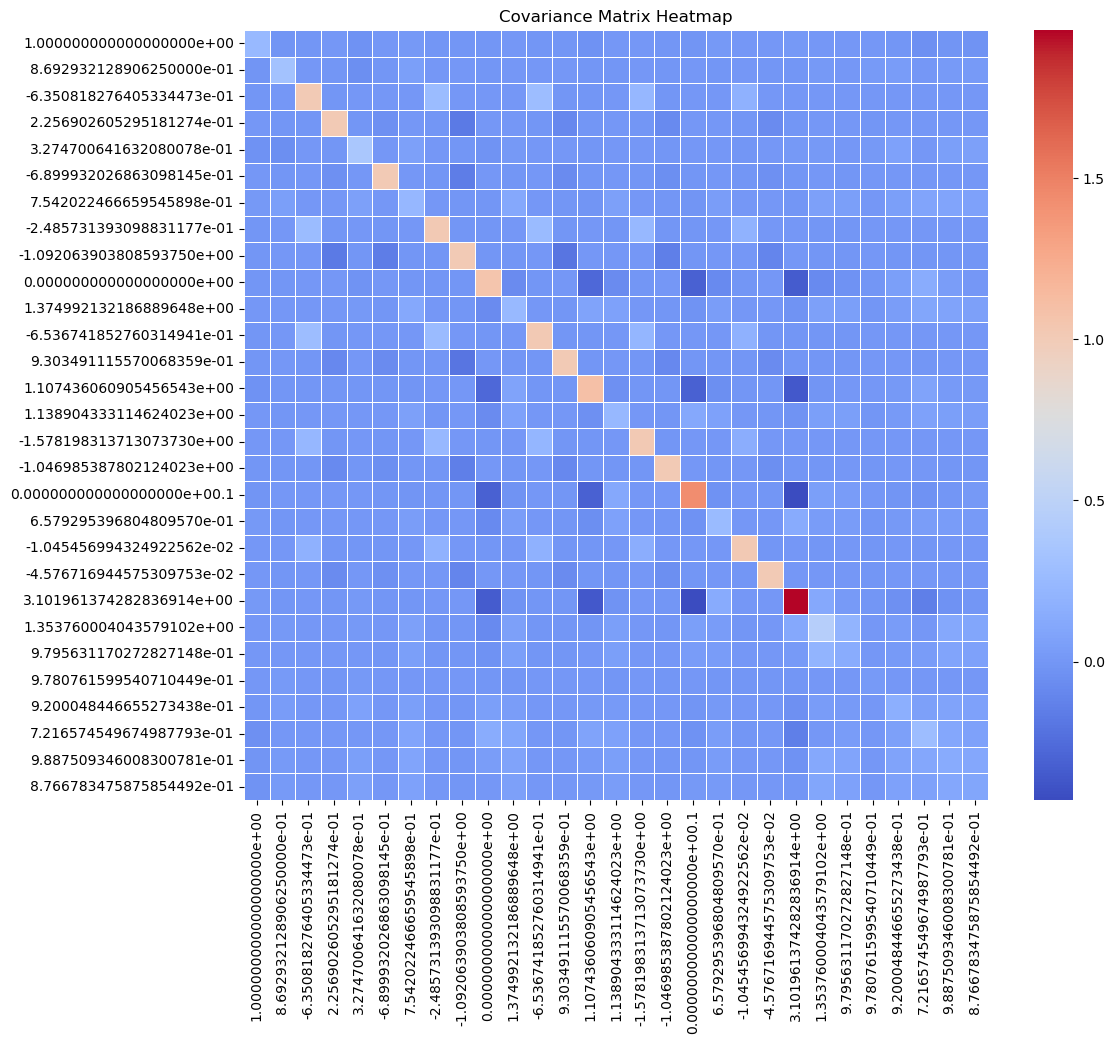

In [126]:
cov_matrix = data.cov()

plt.figure(figsize=(12, 10))

sns.heatmap(cov_matrix, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Covariance Matrix Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [127]:
outliers = {}

for column in data.columns:
    skewness = data[column].skew()
    
    if abs(skewness) < 0.5:  # Approximately normal
        # Use Z-score for normally distributed columns
        threshold = 3
        z_scores = zscore(data[column].dropna())
        outliers[column] = data[column][np.abs(z_scores) > threshold]
        print(f"{column}: Z-score method detected {len(outliers[column])} outliers")
    
    elif abs(skewness) >= 0.5:  # Skewed or non-normal
        # Use IQR for skewed distributions
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = data[column][(data[column] < Q1 - 2 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
        print(f"{column}: IQR method detected {len(outliers[column])} outliers")


1.000000000000000000e+00: Z-score method detected 0 outliers
8.692932128906250000e-01: IQR method detected 4353 outliers
-6.350818276405334473e-01: Z-score method detected 0 outliers
2.256902605295181274e-01: Z-score method detected 0 outliers
3.274700641632080078e-01: IQR method detected 3288 outliers
-6.899932026863098145e-01: Z-score method detected 0 outliers
7.542022466659545898e-01: IQR method detected 5499 outliers
-2.485731393098831177e-01: Z-score method detected 0 outliers
-1.092063903808593750e+00: Z-score method detected 0 outliers
0.000000000000000000e+00: Z-score method detected 0 outliers
1.374992132186889648e+00: IQR method detected 4293 outliers
-6.536741852760314941e-01: Z-score method detected 0 outliers
9.303491115570068359e-01: Z-score method detected 0 outliers
1.107436060905456543e+00: Z-score method detected 0 outliers
1.138904333114624023e+00: IQR method detected 3540 outliers
-1.578198313713073730e+00: Z-score method detected 0 outliers
-1.046985387802124023e+

### 1.2 Data Normalization/Standardization

"Input features were standardized over the entire train/test set with mean zero and standard deviation one, except for those features with values strictly greater than zero – these we scaled so that the mean value was one."
~ [Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://arxiv.org/pdf/1402.4735)

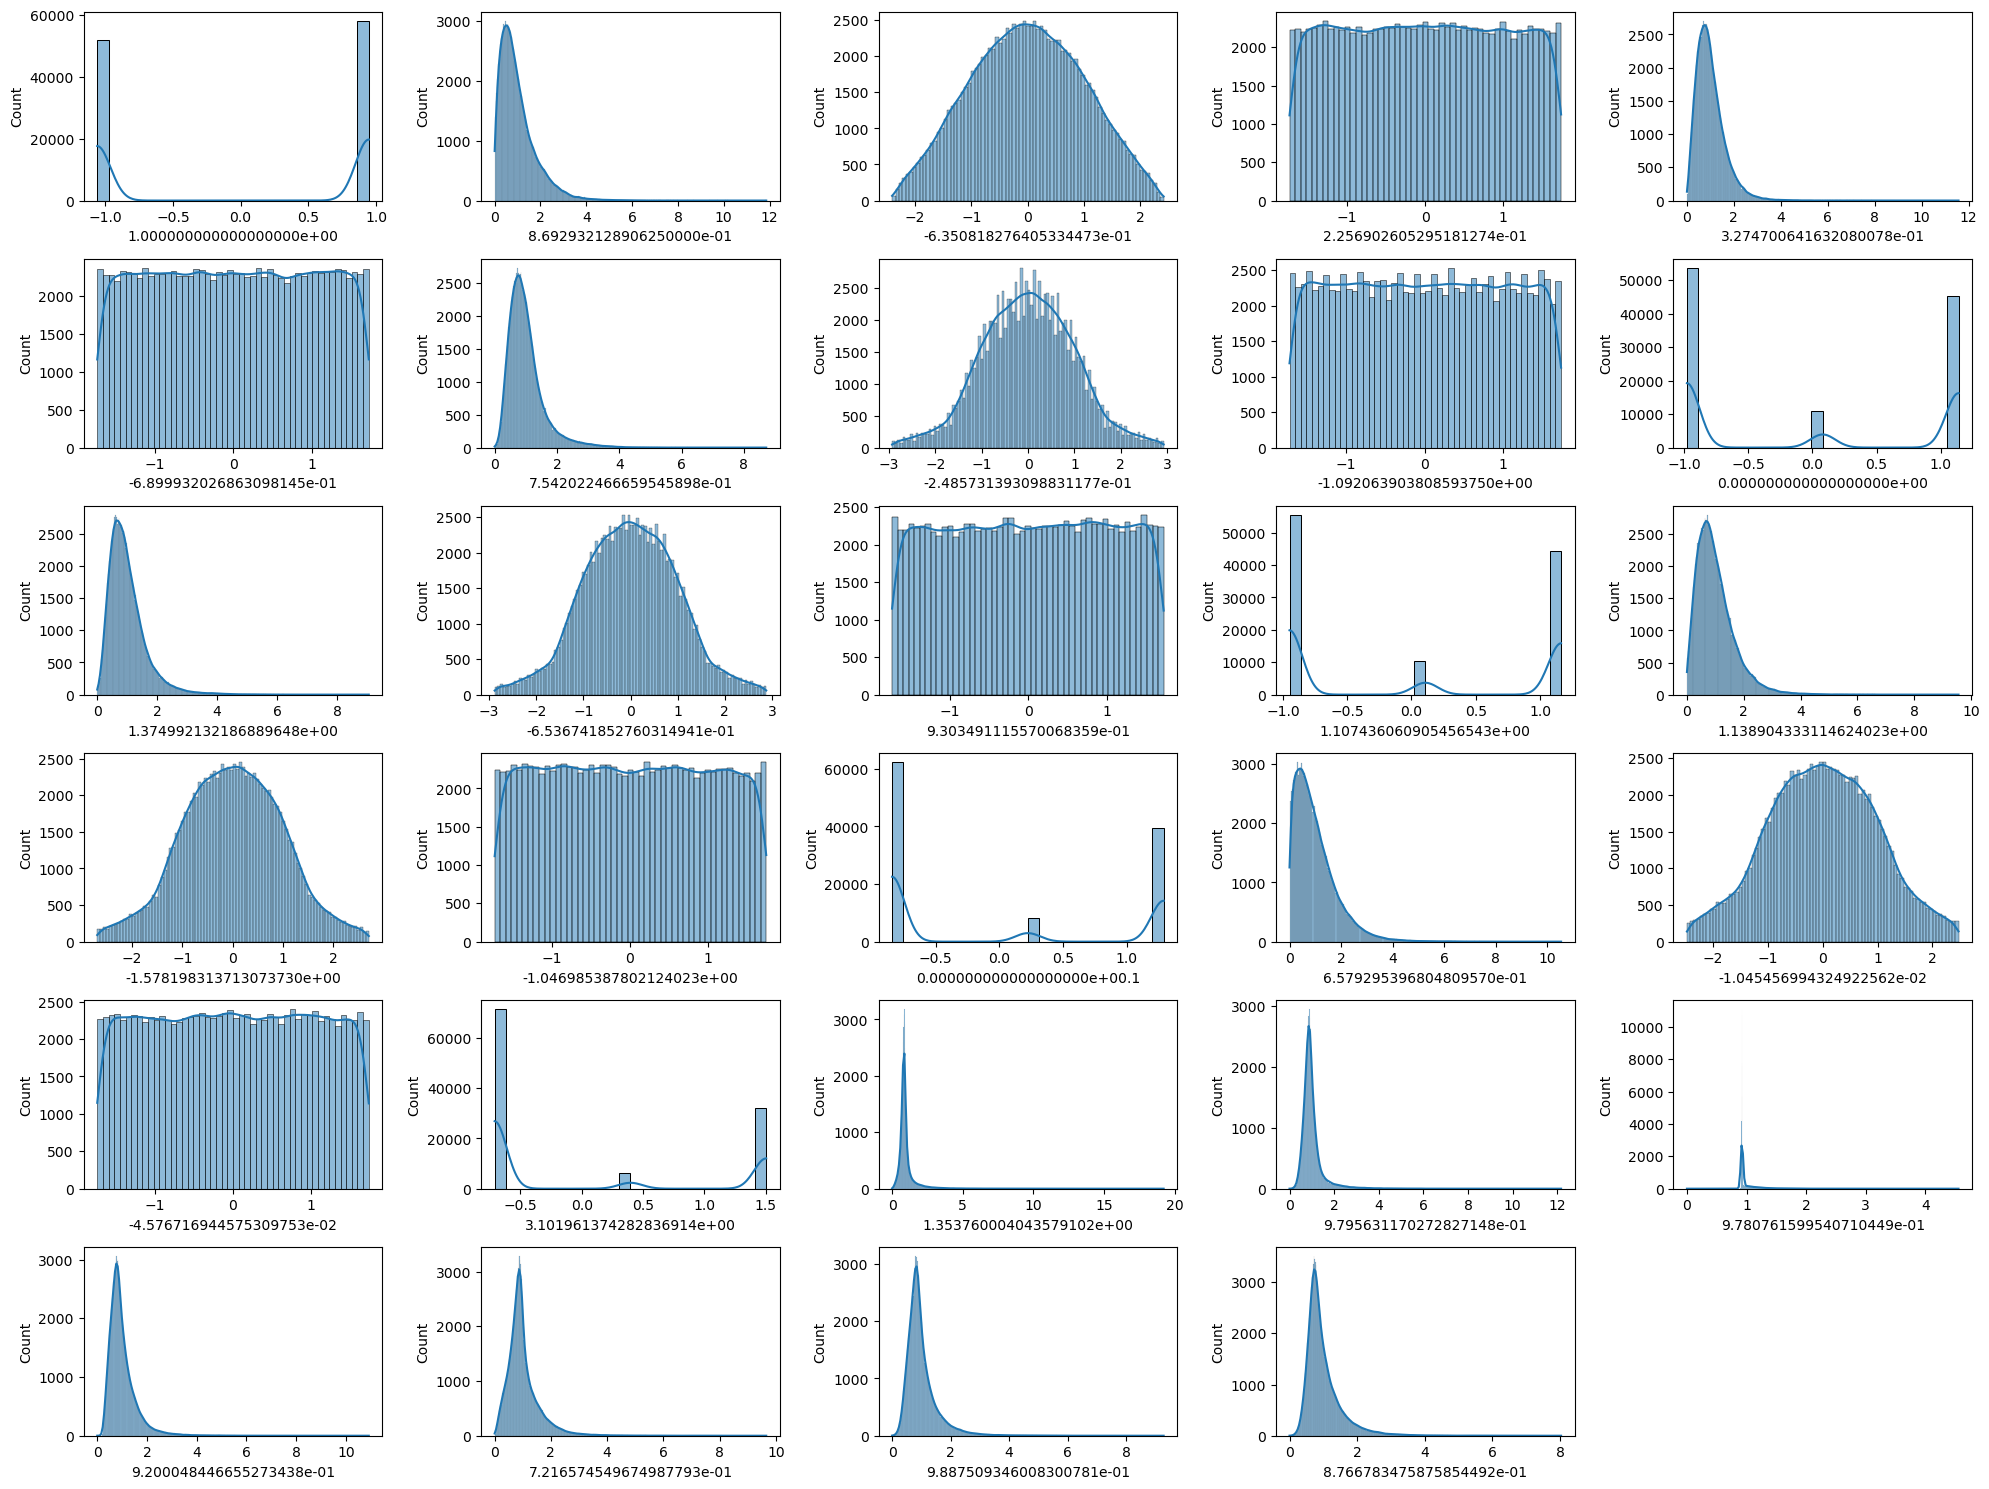

In [130]:
# Identify columns with strictly positive values
positive_only_columns = [col for col in data.columns if (data[col] > 0).all()]

# Separate data into positive-only and other columns
data_positive_only = data[positive_only_columns]
data_other = data.drop(columns=positive_only_columns)

# Standardize columns with both positive and negative values
scaler = StandardScaler()
data_other_scaled = scaler.fit_transform(data_other)
data_other_scaled = pd.DataFrame(data_other_scaled, columns=data_other.columns)

# Scale positive-only columns so the mean is 1
scaler_positive = MinMaxScaler()
data_positive_only_scaled = scaler_positive.fit_transform(data_positive_only)
data_positive_only_scaled = pd.DataFrame(data_positive_only_scaled, columns=data_positive_only.columns)
data_positive_only_scaled = data_positive_only_scaled * (1 / data_positive_only_scaled.mean())

# Combine both scaled parts back into a single DataFrame
data_scaled = pd.concat([data_other_scaled, data_positive_only_scaled], axis=1)
data_scaled = data_scaled[data.columns]  # Reorder columns to match original data order

# Plot the histograms of each feature
plt.figure(figsize=(20, 15))
rows, cols = 6, 5

for idx, column in enumerate(data_scaled.columns):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(data_scaled[column], kde=True)

plt.tight_layout()
plt.show()

### 1.3 Feature Engineering